# Introduction

The goal of this project is to visualise, how the impact of Players NOT born in the USA has changed over the years. 

This project uses a Seasons_stats.csv file from Kaggle: https://www.kaggle.com/drgilermo/nba-players-stats.  Seasons_stats.csv contains stats from every NBA player each season from 1949/1950 until 2016/2017. Stats from the last couple of seasons were imported from basketball-reference.com. For 2018:
- stats_2018: https://www.basketball-reference.com/leagues/NBA_2018_totals.html
- adv_2018: https://www.basketball-reference.com/leagues/NBA_2018_advanced.html

And for 2019:
- stats_2019: https://www.basketball-reference.com/leagues/NBA_2019_totals.html
- adv_2019: https://www.basketball-reference.com/leagues/NBA_2019_advanced.html

The list of international Players comes from Wikipedia: https://en.wikipedia.org/wiki/List_of_foreign_NBA_players

Important note: There is a lot of data that is missing, because not every stat is available since the first season. More details and explaination of each stat: https://www.basketball-reference.com/about/glossary.html

### Imports
Import libraries.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline


# Project specific imports
from unidecode import unidecode

In [2]:
# plot settings
# I had to separate this part from import of pyplot,
# because figure.figsize were ignored
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.dpi': 72.0,
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'axes.grid':True,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'grid.color':'gray',
         'grid.linewidth': 0.5,
         'grid.linestyle': ':'}
pylab.rcParams.update(params)

# Analysis/Modeling
### Import statistics

In [3]:
stat = pd.read_csv('Seasons_Stats.csv')

### Introducing Data Frame

In [4]:
stat.shape
stat.dtypes

(24691, 53)

Unnamed: 0      int64
Year          float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
               ...   
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
TOV           float64
PF            float64
PTS           float64
Length: 53, dtype: object

### Cleaning

In [5]:
stat = stat.rename(columns={'Unnamed: 0': 'Rk'})
stat.isna().sum()

Rk           0
Year        67
Player      67
Pos         67
Age         75
Tm          67
G           67
GS        6458
MP         553
PER        590
TS%        153
3PAr      5852
FTr        166
ORB%      3899
DRB%      3899
          ... 
2PA         67
2P%        195
eFG%       166
FT          67
FTA         67
FT%        925
ORB       3894
DRB       3894
TRB        379
AST         67
STL       3894
BLK       3894
TOV       5046
PF          67
PTS         67
Length: 53, dtype: int64

#### Dropping rows where Player is NaN

In [6]:
stat = stat.dropna(subset=['Player']);

#### Dropping two columns with no values

In [7]:
stat = stat.drop(['blanl', 'blank2'], axis=1);

# delete asteriks from Hall of Famers
stat['Player'] = stat['Player'].str.replace('*', '');

### Import stats from 2018

In [8]:
stats_2018 = pd.read_csv('ignore/stats_2018.csv')
adv_2018 = pd.read_csv('ignore/adv_2018.csv')

#### Finding rows without stats and deleting them

In [9]:
stats_rows_to_delete = stats_2018.loc[stats_2018['Player'] == 'Player']
adv_rows_to_delete = adv_2018.loc[adv_2018['Player'] == 'Player']

stats_2018 = stats_2018.drop(stats_rows_to_delete.index)
adv_2018 = adv_2018.drop(adv_rows_to_delete.index)

#### Deleting columns containing 'Unnamed'

In [10]:
adv_2018 = adv_2018.loc[:, ~adv_2018.columns.str.contains('Unnamed')]

#### Finding differences in column names for both Data Frames

In [11]:
cols = adv_2018.columns.difference(stats_2018.columns)
cols

Index(['3PAr', 'AST%', 'BLK%', 'BPM', 'DBPM', 'DRB%', 'DWS', 'FTr', 'OBPM',
       'ORB%', 'OWS', 'PER', 'STL%', 'TOV%', 'TRB%', 'TS%', 'USG%', 'VORP',
       'WS', 'WS/48'],
      dtype='object')

#### Joining both Data Frames ignoring duplicated columns

In [12]:
stats_2018 = stats_2018.join(adv_2018[cols])
stats_2018.shape
stats_2018.dtypes

(664, 50)

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
           ...  
DRB%      object
DWS       object
FTr       object
OBPM      object
ORB%      object
OWS       object
PER       object
STL%      object
TOV%      object
TRB%      object
TS%       object
USG%      object
VORP      object
WS        object
WS/48     object
Length: 50, dtype: object

#### Converting to numerical values

In [13]:
cols = stats_2018.columns.values[5:]
stats_2018[cols] = stats_2018[cols].apply(pd.to_numeric, errors='coerce')
stats_2018.dtypes

Rk         object
Player     object
Pos        object
Age        object
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
           ...   
DRB%      float64
DWS       float64
FTr       float64
OBPM      float64
ORB%      float64
OWS       float64
PER       float64
STL%      float64
TOV%      float64
TRB%      float64
TS%       float64
USG%      float64
VORP      float64
WS        float64
WS/48     float64
Length: 50, dtype: object

In [14]:
stat.columns.difference(stats_2018.columns)

Index(['Year'], dtype='object')

In [15]:
stats_2018['Year'] = 2018
stats_2018.sample(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,...,BLK,TOV,PF,PTS,3PAr,AST%,BLK%,BPM,DBPM,DRB%,DWS,FTr,OBPM,ORB%,OWS,PER,STL%,TOV%,TRB%,TS%,USG%,VORP,WS,WS/48,Year
672,527,Jeff Withey,C,27,DAL,9,0,39,6,16,0.375,2,10,0.200,4,6,0.667,0.438,1,2,0.500,1,9,10,0,...,3,2,3,15,0.625,0.0,6.8,-12.8,-3.7,26.6,0.1,0.125,-9.1,2.8,-0.1,8.3,0.0,10.6,14.2,0.444,22.0,-0.1,0.0,-0.054,2018
24,23,Ömer Aşık,C,31,NOP,14,0,121,7,16,0.438,0,0,NaN,7,16,0.438,0.438,4,12,0.333,7,30,37,2,...,2,5,14,18,0.000,2.0,1.3,-8.1,-0.7,26.0,0.1,0.750,-7.4,6.5,-0.1,4.5,0.4,19.0,16.6,0.423,9.4,-0.2,0.0,0.008,2018
572,446,Ramon Sessions,PG,31,WAS,15,0,225,25,64,0.391,6,15,0.400,19,49,0.388,0.438,32,42,0.762,5,15,20,50,...,1,15,15,88,0.234,31.1,0.4,-3.7,-2.9,7.5,0.1,0.656,-0.8,2.5,0.4,14.9,1.5,15.4,5.0,0.533,19.1,-0.1,0.5,0.116,2018
63,54,Bogdan Bogdanović,SG,25,SAC,78,53,2175,344,772,0.446,129,329,0.392,215,443,0.485,0.529,100,119,0.840,31,192,223,258,...,16,125,172,917,0.426,18.3,0.7,-1.0,-1.5,10.5,1.1,0.154,0.5,1.6,1.8,13.5,1.7,13.2,5.8,0.556,19.6,0.6,2.9,0.064,2018
153,121,Troy Daniels,SG,26,PHO,79,15,1622,232,575,0.403,183,458,0.400,49,117,0.419,0.563,56,64,0.875,12,115,127,48,...,5,56,137,703,0.797,4.5,0.2,-2.9,-3.6,7.7,0.0,0.111,0.7,0.8,1.4,9.8,0.8,8.5,4.2,0.583,17.2,-0.4,1.4,0.042,2018


### Import stats from 2019

The steps are identical with those from 2018 stats

In [16]:
stats_2019 = pd.read_csv('ignore/stats_2019.csv')
adv_2019 = pd.read_csv('ignore/adv_2019.csv')

#### Finding rows without stats and deleting them

In [17]:
stats_rows_to_delete = stats_2019.loc[stats_2019['Player'] == 'Player']
adv_rows_to_delete = adv_2019.loc[adv_2019['Player'] == 'Player']

stats_2019 = stats_2019.drop(stats_rows_to_delete.index)
adv_2019 = adv_2019.drop(adv_rows_to_delete.index)

#### Deleting columns containing 'Unnamed'

In [18]:
adv_2019 = adv_2019.loc[:, ~adv_2019.columns.str.contains('Unnamed')]

In [19]:
cols = adv_2019.columns.difference(stats_2019.columns)
cols

Index(['3PAr', 'AST%', 'BLK%', 'BPM', 'DBPM', 'DRB%', 'DWS', 'FTr', 'OBPM',
       'ORB%', 'OWS', 'PER', 'STL%', 'TOV%', 'TRB%', 'TS%', 'USG%', 'VORP',
       'WS', 'WS/48'],
      dtype='object')

In [20]:
stats_2019 = stats_2019.join(adv_2019[cols])
stats_2019.shape

(708, 50)

In [21]:
cols = stats_2019.columns.values[5:]
stats_2019[cols] = stats_2019[cols].apply(pd.to_numeric, errors='coerce')
stats_2019.dtypes

Rk         object
Player     object
Pos        object
Age        object
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
           ...   
DRB%      float64
DWS       float64
FTr       float64
OBPM      float64
ORB%      float64
OWS       float64
PER       float64
STL%      float64
TOV%      float64
TRB%      float64
TS%       float64
USG%      float64
VORP      float64
WS        float64
WS/48     float64
Length: 50, dtype: object

In [22]:
stat.columns.difference(stats_2019.columns)

Index(['Year'], dtype='object')

In [23]:
stats_2019['Year'] = 2019
stats_2019.sample(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,...,BLK,TOV,PF,PTS,3PAr,AST%,BLK%,BPM,DBPM,DRB%,DWS,FTr,OBPM,ORB%,OWS,PER,STL%,TOV%,TRB%,TS%,USG%,VORP,WS,WS/48,Year
695,501,Brad Wanamaker,PG,29,BOS,36,0,343,50,105,0.476,16,39,0.410,34,66,0.515,0.552,24,28,0.857,3,38,41,56,...,2,19,34,140,0.371,22.5,0.5,-2.2,-1.4,11.8,0.4,0.267,-0.8,0.9,0.6,14.3,1.7,13.9,6.4,0.597,17.1,0.0,1.0,0.134,2019
666,476,Klay Thompson,SG,28,GSW,78,78,2652,655,1402,0.467,241,599,0.402,414,803,0.516,0.553,129,158,0.816,37,262,299,186,...,47,115,157,1680,0.427,10.5,1.5,-0.8,-2.0,10.1,2.3,0.113,1.2,1.6,2.9,16.6,1.5,7.2,6.0,0.571,25.6,0.8,5.3,0.095,2019
583,422,Austin Rivers,SG,26,HOU,47,13,1345,156,378,0.413,71,221,0.321,85,157,0.541,0.507,25,49,0.510,15,76,91,109,...,13,32,135,408,0.585,11.7,0.8,-2.9,-1.5,6.4,0.6,0.130,-1.4,1.2,0.8,8.2,1.1,7.4,3.7,0.511,13.9,-0.3,1.4,0.050,2019
359,266,Stanley Johnson,SF,22,NOP,18,0,247,38,91,0.418,11,34,0.324,27,57,0.474,0.478,9,13,0.692,9,33,42,28,...,1,26,22,96,0.374,15.1,0.3,-4.7,-0.9,13.7,0.2,0.143,-3.8,3.8,-0.3,8.9,2.3,21.2,8.8,0.496,20.4,-0.2,-0.1,-0.028,2019
228,169,Bryn Forbes,SG,25,SAS,82,81,2293,361,791,0.456,176,413,0.426,185,378,0.489,0.568,69,78,0.885,18,221,239,175,...,4,80,159,967,0.522,10.6,0.1,-0.7,-1.7,10.4,1.3,0.099,1.0,0.9,2.5,12.0,1.0,8.8,5.7,0.586,17.4,0.7,3.8,0.079,2019


In [24]:
stat.columns.difference(stats_2019.columns)

Index([], dtype='object')

### Adding stats from last two years to the Data from Kaggle

In [25]:
stat = pd.concat([stat, stats_2018], sort=False)
stat = stat.reset_index(drop=True)

stat = pd.concat([stat, stats_2019], sort=False)
stat = stat.reset_index(drop=True)

In [26]:
stat.shape
stat.sample(5)

(25996, 51)

,Rk,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,...,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
19374,19433,2009.0,Will Bynum,PG,26,DET,57.0,1.0,803.0,17.4,0.520,0.056,0.348,2.8,8.4,5.5,35.3,2.3,0.2,16.2,27.9,0.5,0.8,1.3,0.078,...,-1.9,-1.7,0.1,156.0,342.0,0.456,3.0,19.0,0.158,153.0,323.0,0.474,0.461,95.0,119.0,0.798,19.0,56.0,75.0,157.0,34.0,2.0,76.0,85.0,410.0
17511,17566,2005.0,Bruno Sundov,C,24,NYK,21.0,0.0,73.0,1.2,0.330,0.081,0.054,9.6,11.3,10.5,4.6,1.5,2.1,13.7,27.4,-0.3,0.0,-0.3,-0.174,...,-3.2,-12.9,-0.2,11.0,37.0,0.297,1.0,3.0,0.333,10.0,34.0,0.294,0.311,2.0,2.0,1.000,6.0,7.0,13.0,2.0,2.0,2.0,6.0,16.0,25.0
660,663,1953.0,Dick Groat,PG,22,FTW,26.0,NaN,663.0,18.2,0.464,NaN,0.507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,0.7,2.0,0.148,...,NaN,NaN,NaN,100.0,272.0,0.368,NaN,NaN,NaN,100.0,272.0,0.368,0.368,109.0,138.0,0.790,NaN,NaN,86.0,69.0,NaN,NaN,NaN,90.0,309.0
16759,16813,2004.0,Roger Mason,SG,23,CHI,3.0,0.0,43.0,-5.5,0.136,0.545,0.000,0.0,7.8,3.8,10.2,1.2,0.0,15.4,13.5,-0.2,0.0,-0.2,-0.196,...,-2.0,-12.2,-0.1,1.0,11.0,0.091,1.0,6.0,0.167,0.0,5.0,0.000,0.136,0.0,0.0,NaN,0.0,3.0,3.0,3.0,1.0,0.0,2.0,5.0,3.0
17061,17116,2005.0,Brent Barry,SG,33,SAS,81.0,8.0,1742.0,14.0,0.580,0.610,0.294,1.9,10.8,6.4,16.3,1.2,0.8,11.0,15.6,3.5,2.7,6.1,0.168,...,0.3,2.0,1.8,194.0,459.0,0.423,100.0,280.0,0.357,94.0,179.0,0.525,0.532,113.0,135.0,0.837,29.0,161.0,190.0,178.0,39.0,20.0,64.0,123.0,601.0


### Replacing International letters

In [27]:
stat['Player'] = stat['Player'].apply(lambda x: unidecode(x))

## Import the list of all time international players

In [28]:
intp = pd.read_csv('international.csv')

In [29]:
intp.shape
intp.dtypes

(698, 8)

Nationality[A]      object
Birthplace[B]       object
Player              object
Pos.                object
Career[C]           object
Yrs                float64
Notes               object
Ref.                object
dtype: object

In [30]:
intp.sample(10)

,Nationality[A],Birthplace[B],Player,Pos.,Career[C],Yrs,Notes,Ref.
216,France,—,Nicolas Batum*,F,2008–present,10.0,—,[223]
71,Brazil,—,Alex Garcia,G,2003–2004,2.0,—,[81]
372,NaN,NaN,(formerly Hiram Fuller),NaN,NaN,NaN,NaN,NaN
88,Cameroon,—,Joel Embiid*,C,2016–present,3.0,—,[101]
637,Turkey,—,Hedo Türkoğlu,F,2000–2015,15.0,—,[611]
90,Cameroon,—,Pascal Siakam*,F,2016–present,3.0,—,[103]
39,Australia,United States,Darnell Mee,G,1993–1995,2.0,"Born in the United States, became a naturalize...",[49]
552,Serbia,SFR Yugoslavia,Kosta Perović,C,2007–2008,1.0,"Born in SFR Yugoslavia,[D] has represented FR ...",[543]
231,France,United States,Joakim Noah*,C,2007–present,12.0,Born in the United States to a French father a...,[239]
593,NaN,NaN,NaN,NaN,2015–2017,NaN,NaN,NaN


### Cleaning

Rename columns. Drop 2 of them and all Player NaNs

In [31]:
intp.columns = ['Nationality', 'Birthplace', 'Player', 'Pos', 'Career', 'Years', 'Notes', 'Ref']
intp = intp.drop(['Notes', 'Ref'], axis=1)
intp = intp.dropna(subset=['Player', 'Nationality'])

#### Drop Players with US Nationality or born in USA

In [32]:
intp = intp.loc[intp.Birthplace != ' United States ']
intp = intp.loc[intp.Nationality != ' United States ']

In [33]:
intp.shape
intp.index = pd.RangeIndex(len(intp))
intp.sample(10)

(420, 6)

,Nationality,Birthplace,Player,Pos,Career,Years
123,Croatia,SFR Yugoslavia,Dino Rađa^,F/C,1993–1997,4.0
293,North Macedonia,SFR Yugoslavia,Pero Antić,F/C,2013–2015,2.0
386,Spain,—,Ricky Rubio*,G,2011–present,8.0
187,Germany,West Germany,Uwe Blab,C,1985–1990,5.0
268,Mexico,—,Jorge Gutiérrez,G,2014–2015;,3.0
265,Mali,—,Cheick Diallo*,F,2016–present,3.0
34,Australia,—,Ben Simmons*,F,2017–present,2.0
2,Argentina,—,Patricio Garino,G,2017,1.0
76,Canada,—,Ron Crevier,C,1985,1.0
236,Italy,—,Andrea Bargnani,F,2006–2016,10.0


#### Checking which Names match with those from stats data frame

In [34]:
intp.loc[intp.Player.isin(stat.Player)]

,Nationality,Birthplace,Player,Pos,Career,Years
156,France,—,Tariq Abdul-Wahad,F,1997–2003,6.0


#### Only one player matches. The list from Wikipedia includes a trailing space and some other additional signs. Let's get rid of them

In [35]:
intp['Player'] = intp['Player'].str.replace('[*^]', '')
# intp['Player'] = intp['Player'].str.replace('^', '')
intp['Player'] = np.where(intp.Player.str.endswith(' '), intp.Player.str[:-1], intp.Player)

#### Decoding international letters

In [36]:
intp['Player'] = intp['Player'].apply(lambda x: unidecode(x))

In [37]:
intp.Player.isin(stat.Player).value_counts()

True     395
False     25
Name: Player, dtype: int64

#### Checking, which players still don't match to those from stats and played more than two seasons

In [38]:
# Note: Never forget parenthesses when using multiple conditions
intp.loc[(~intp.Player.isin(stat.Player)) & (intp.Years > 2.0)]

,Nationality,Birthplace,Player,Pos,Career,Years
41,Belgium,Zaire,Didier Mbenga,C,2004–2011,7.0
56,Brazil,—,Nene,F/C,2002–present,17.0
123,Croatia,SFR Yugoslavia,Dino Rada,F/C,1993–1997,4.0
201,Germany,West Germany,Christian Welp,C,1987–1990,3.0
301,Puerto Rico,—,Jose Juan Barea,G,2006–present,13.0
313,Russia,Soviet Union,Victor Khryapa,F,2004–2008,4.0
364,Slovenia,SFR Yugoslavia,Radoslav Nesterovic,C,1998–2010,12.0
409,Ukraine,Soviet Union,Slava Medvedenko,F,2000–2007,7.0


Adding those manually

<span style="color:red">Question: Can I do something like this or is it considered to be a bad practice? </span>

In [39]:
intp.loc[intp.Player == 'Nene', 'Player'] = 'Nene Hilario'
intp.loc[intp.Player == 'Radoslav Nesterovic', 'Player'] = 'Rasho Nesterovic'
intp.loc[intp.Player == 'Jose Juan Barea', 'Player'] = 'J.J. Barea'
intp.loc[intp.Player == 'Didier Mbenga', 'Player'] = 'Didier Ilunga-Mbenga'
intp.loc[intp.Player == 'Slava Medvedenko', 'Player'] = 'Stanislav Medvedenko'
intp.loc[intp.Player == 'Jakob Poltl', 'Player'] = 'Jakob Poeltl'
intp.loc[intp.Player == 'Victor Khryapa', 'Player'] = 'Viktor Khryapa'
intp.loc[intp.Player == 'Dino Rada', 'Player'] = 'Dino Radja'
intp.loc[intp.Player == 'Luc Mbah a Moute', 'Player'] = 'Luc Mbah'
intp.loc[intp.Player == 'Christian Welp', 'Player'] = 'Chris Welp'

intp.Player.isin(stat.Player).value_counts()
# intp.loc[~intp.Player.isin(stat.Player)].sample(20)

True     403
False     17
Name: Player, dtype: int64

So at this point there are international Players, that will be ignored. Non of them has played more than 2 seasons in the NBA though

# Results

Showing how the numbers changed over the years

#### Creating the Data Frame with statistics only for international Players

In [40]:
stati = stat.loc[stat.Player.isin(intp.Player)]
stati.shape

(2287, 51)

#### Grouping all the stats, and international players stats by year

In [41]:
stat_by_year = stat.groupby(stat.Year).sum()
stati_by_year = stati.groupby(stati.Year).sum()

#### Number of international players per year

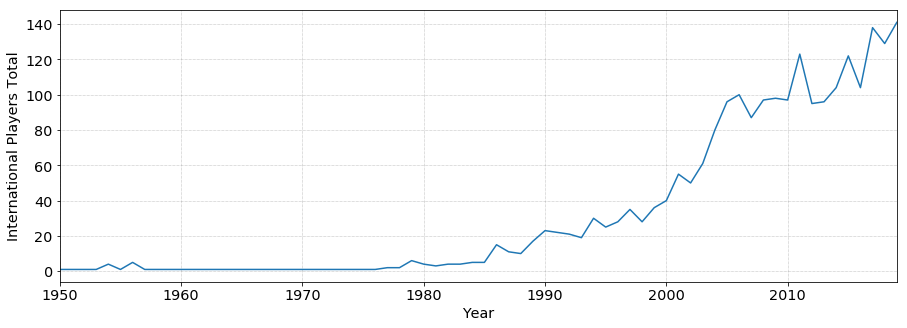

In [42]:
stati.Player.groupby(stati.Year).count().plot();
plt.ylabel('International Players Total');
plt.xlabel('Year');

### Comparing nba stat totals to international stat totals

#### Points

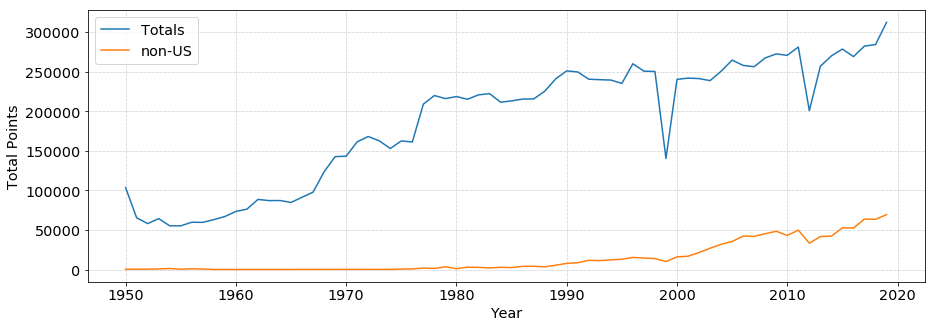

In [43]:
plt.plot(stat_by_year.index,stat_by_year.PTS);
plt.plot(stati_by_year.index,stati_by_year.PTS);
plt.ylabel('Total Points');
plt.xlabel('Year');
plt.legend(['Totals', 'non-US']);

#### Minutes Played

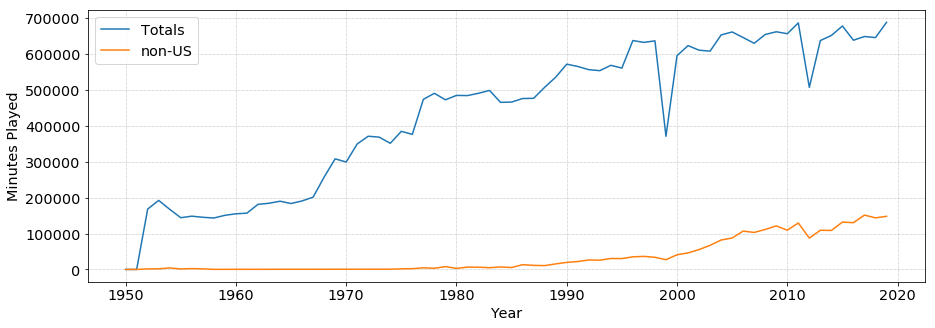

In [44]:
plt.plot(stat_by_year.index,stat_by_year.MP);
plt.plot(stati_by_year.index,stati_by_year.MP);
plt.ylabel('Minutes Played');
plt.xlabel('Year');
plt.legend(['Totals', 'non-US']);

#### Blocks

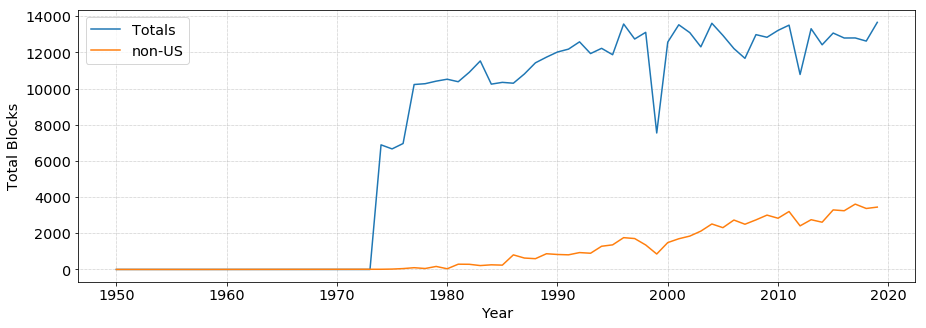

In [45]:
plt.plot(stat_by_year.index,stat_by_year.BLK);
plt.plot(stati_by_year.index,stati_by_year.BLK);
plt.ylabel('Total Blocks');
plt.xlabel('Year');
plt.legend(['Totals', 'non-US']);

#### Made 3 Point Shots

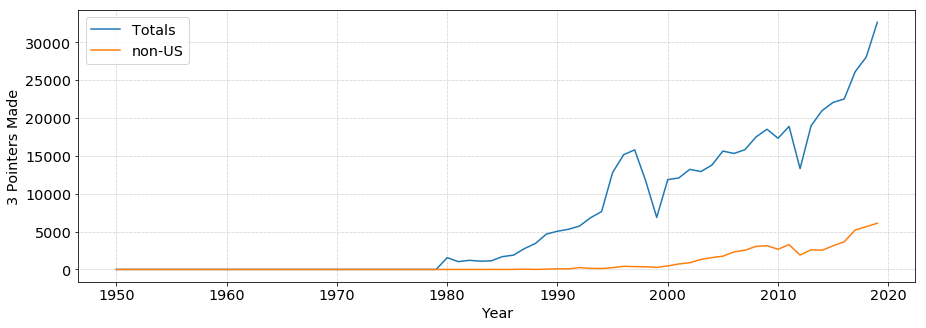

In [46]:
plt.plot(stat_by_year.index,stat_by_year['3P']);
plt.plot(stati_by_year.index,stati_by_year['3P']);
plt.ylabel('3 Pointers Made');
plt.xlabel('Year');
plt.legend(['Totals', 'non-US']);

#### Rebounds

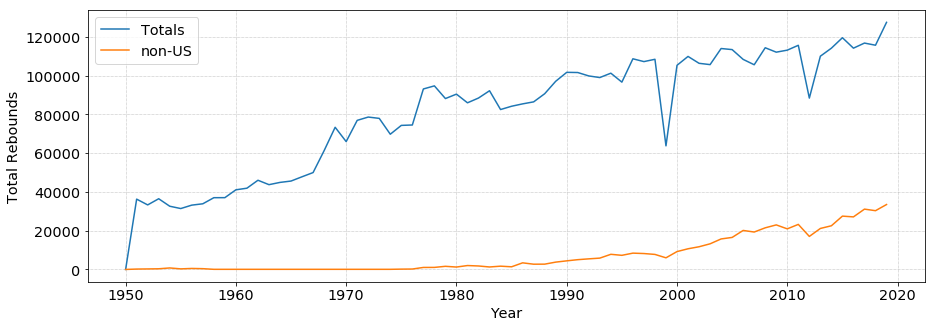

In [47]:
plt.plot(stat_by_year.index,stat_by_year.TRB);
plt.plot(stati_by_year.index,stati_by_year.TRB);
plt.ylabel('Total Rebounds');
plt.xlabel('Year');
plt.legend(['Totals', 'non-US']);

#### Assists

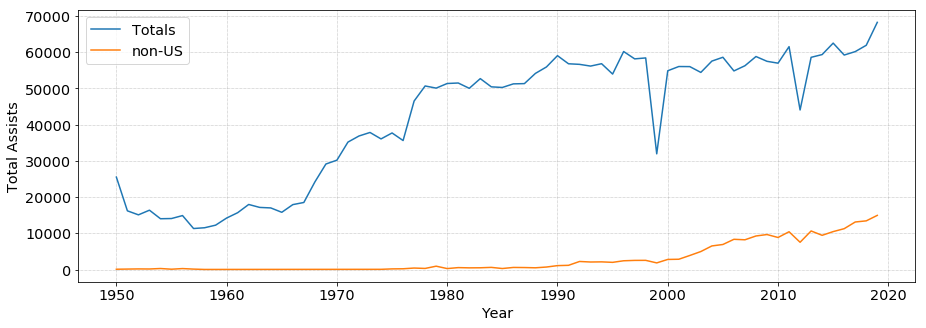

In [48]:
plt.plot(stat_by_year.index,stat_by_year.AST);
plt.plot(stati_by_year.index,stati_by_year.AST);
plt.ylabel('Total Assists');
plt.xlabel('Year');
plt.legend(['Totals', 'non-US']);

# Conclusions

I tried to show, how the impact of nba players NOT born in USA changed over the years. I was quite disappointed with the results, because I did not find any huge dependencies or rapid improvement.

The totals of every stats are growing, but it is caused by the growing number of International Players is the NBA. 